In [12]:

import pandas as pd
import sys

sys.path.insert(1, '../rule_lib')

from rule_benchmark import *

In [13]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
FOLDERS = ["approach1", "approach2"]

In [15]:
train = pd.read_pickle("train.pkl")
test = pd.read_pickle("test.pkl")


Number of rules:  105
Number of input variables:  5
Number of output variables:  3

approach1/:

Container_DataLayout:


/home/manuel/AutoPas-FuzzyTuning-Bachelor-Thesis/data/analysis/pause-during-examples/../../../notes/1-Testing/fuzzy-test/python/fuzzy_system.py:348: RuntimeWarning: overflow encountered in exp
  def function(x): return 1 / (1 + np.exp(-width * (x - center)))


	Test set:
		LinkedCells_AoS         :  70.00%	(14/20)
		PairwiseVerletLists_SoA :  25.00%	(1/4)
		VerletClusterLists_AoS  :  93.33%	(14/15)
		VerletClusterLists_SoA  :   0.00%	(0/1)
		Total                   :  72.50%	(29/40)

	Train set:
		VerletClusterLists_AoS  :  98.25%	(56/57)
		PairwiseVerletLists_SoA :  88.89%	(8/9)
		LinkedCells_AoS         :  69.23%	(9/13)
		VerletClusterLists_SoA  : 100.00%	(1/1)
		Total                   :  92.50%	(74/80)

Traversal:
	Test set:
		lc_sliced_balanced      :   0.00%	(0/2)
		vcl_sliced              : 100.00%	(1/1)
		lc_c04                  :  73.33%	(22/30)
		lc_c01                  :   0.00%	(0/3)
		lc_c18                  :   0.00%	(0/2)
		lc_sliced               : 100.00%	(2/2)
		Total                   :  62.50%	(25/40)

	Train set:
		lc_c04                  :  80.70%	(46/57)
		vcl_sliced              : 100.00%	(11/11)
		lc_c18                  :   0.00%	(0/3)
		lc_sliced_balanced      :   0.00%	(0/5)
		lc_sliced               : 100.00%	(2/

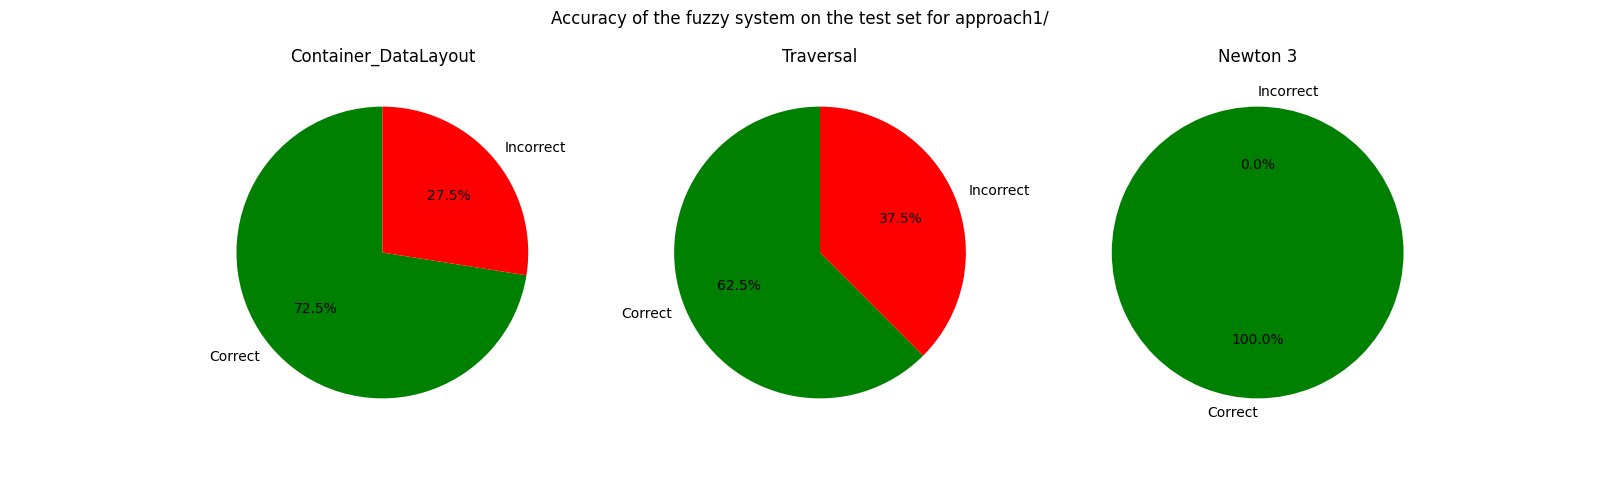

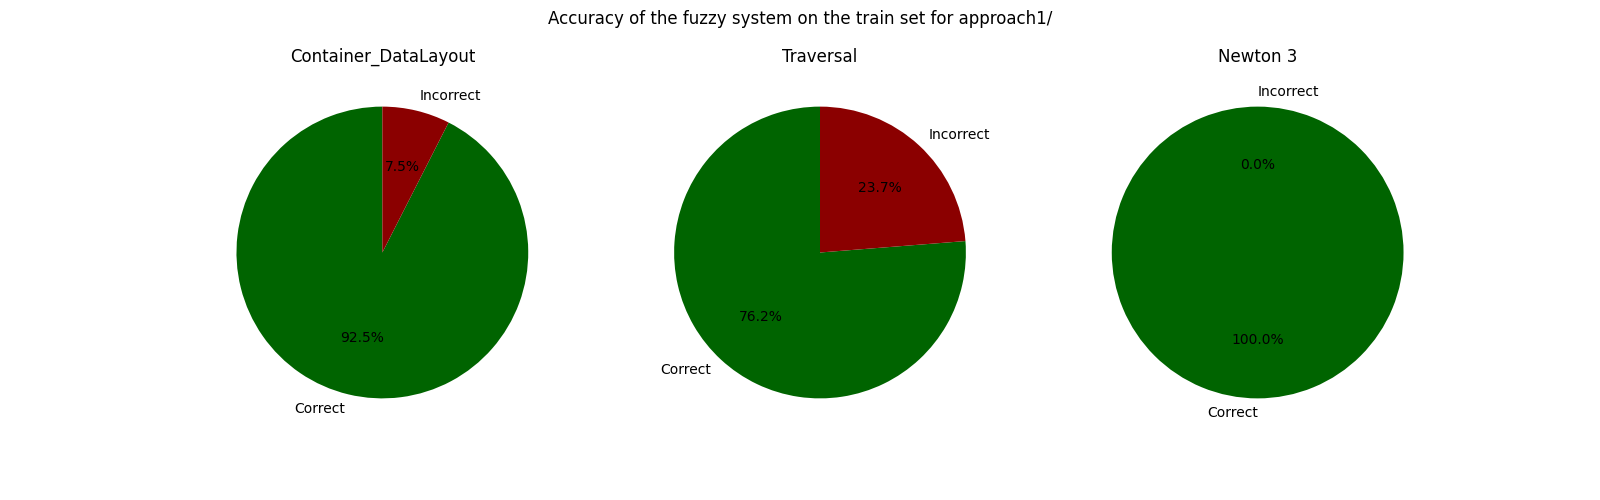

Number of rules:  105
Number of input variables:  5
Number of output variables:  3

approach2/:

Container_DataLayout:
	Test set:
		PairwiseVerletLists_SoA : 100.00%	(1/1)
		LinkedCells_AoS         :  81.25%	(13/16)
		VerletClusterLists_AoS  : 100.00%	(2/2)
		LinkedCells_SoA         :   0.00%	(0/1)
		Total                   :  80.00%	(16/20)

	Train set:
		LinkedCells_AoS         :  78.46%	(51/65)
		PairwiseVerletLists_SoA :  88.89%	(8/9)
		VerletClusterLists_AoS  : 100.00%	(5/5)
		LinkedCells_SoA         : 100.00%	(1/1)
		Total                   :  81.25%	(65/80)

Traversal:
	Test set:
		lc_sliced_balanced      :   0.00%	(0/1)
		vcl_sliced_balanced     :   0.00%	(0/11)
		lc_c04                  :  20.00%	(1/5)
		vcl_sliced              : 100.00%	(1/1)
		lc_c18                  :   0.00%	(0/2)
		Total                   :  10.00%	(2/20)

	Train set:
		vcl_sliced_balanced     :   0.00%	(0/41)
		lc_sliced_balanced      :   0.00%	(0/8)
		lc_sliced               :  16.67%	(1/6)
		vcl_sliced

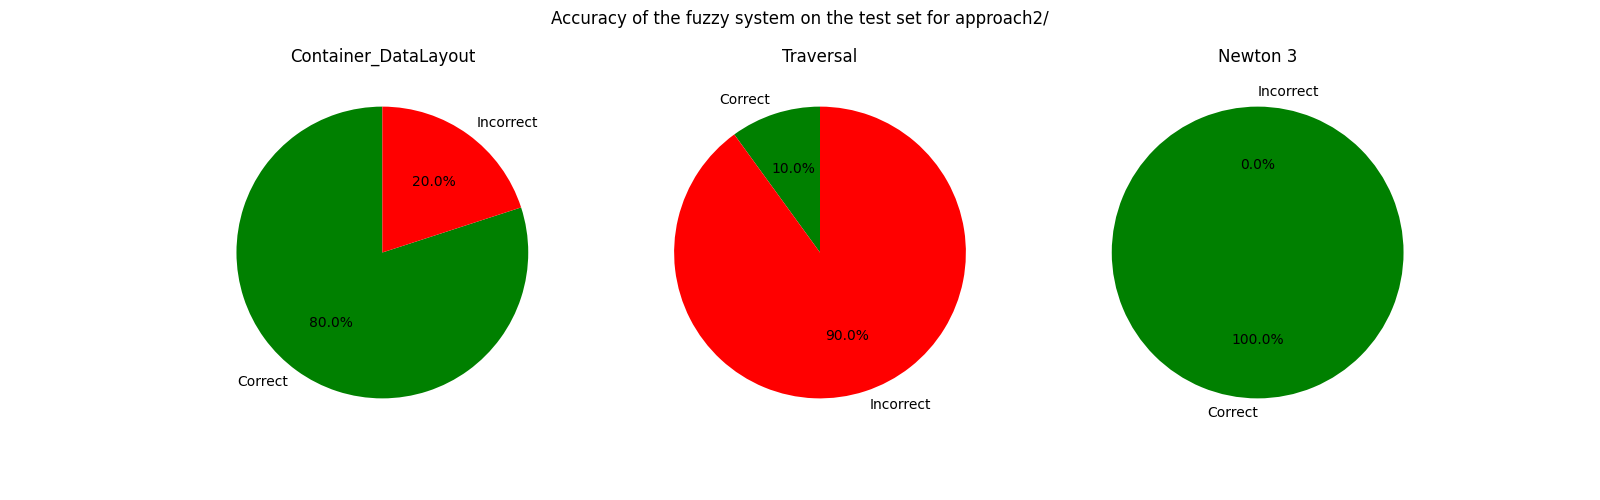

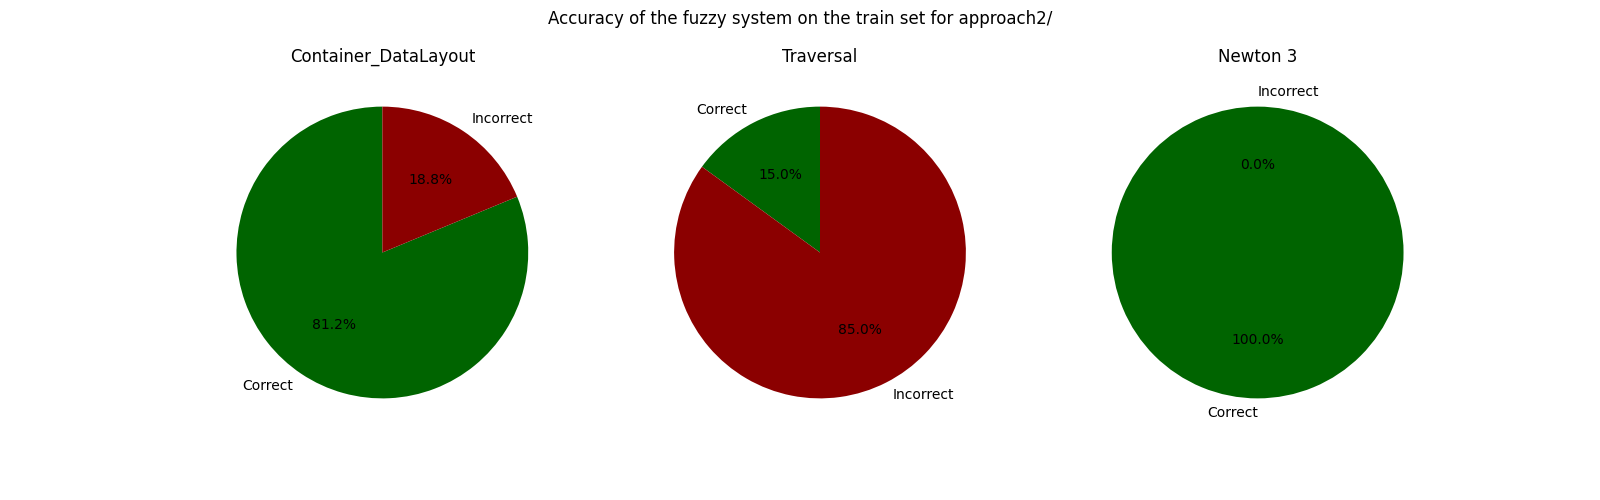

In [18]:
# The K parameter selects how many defuzzified predictions are used in order of decreasing confidence

benchmark_rules("approach1/", train, test, K=2)
fiss, output_ranking = benchmark_rules("approach2/", train, test, K=1)

# Findings

- MoM works way better than the other methods.
- This is probably since the output variable is categorical and therefore interpolating between them is not a good idea.
  - Also the placement on the x-axis is somehow arbitrary. This also makes interpolation meaningless
- Traversal is very hard to predict. Maybe because there are so many possible values.